In [1]:
import pyspark
from pyspark.sql.functions import *
import wrangle
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.ion()
plt.rc("figure", figsize=(13, 7))
plt.rc("font", size=14)
plt.style.use("ggplot")

In [2]:
spark = pyspark.sql.SparkSession.builder.getOrCreate()

df = wrangle.wrangle_311(spark)

[wrangle.py] reading case.csv
[wrangle.py] handling data types
[wrangle.py] parsing dates
[wrangle.py] adding features
[wrangle.py] joining departments


- How many different cases are there, by department?

In [3]:
df.show(1, vertical=True)

-RECORD 0------------------------------------
 case_id              | 1014127332           
 case_opened_date     | 2018-01-01 00:42:00  
 case_closed_date     | 2018-01-01 12:29:00  
 case_due_date        | 2020-09-26 00:42:00  
 case_late            | false                
 num_days_late        | -998.5087616000001   
 case_closed          | true                 
 service_request_type | Stray Animal         
 SLA_days             | 999.0                
 case_status          | Closed               
 source_id            | svcCRMLS             
 request_address      | 2315  EL PASO ST,... 
 council_district     | 005                  
 num_weeks_late       | -142.6441088         
 zipcode              | 78207                
 case_age             | 219                  
 days_to_closed       | 0                    
 case_lifetime        | 0                    
 department           | Animal Care Services 
 dept_subject_to_SLA  | true                 
only showing top 1 row



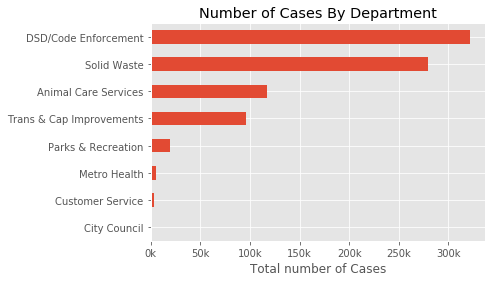

In [4]:
def format_number(x, *args):
    return "{:.0f}k".format(x / 1000)

(df.groupby("department")
    .count()
    .toPandas()
    .set_index("department")["count"]
    .sort_values()
    .plot.barh()
)
plt.gca().set(
    ylabel="", xlabel="Total number of Cases", title="Number of Cases By Department"
)
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_number))

- Does the percentage of cases that are late vary by department?

[Text(0, 0.5, ''),
 Text(0.5, 0, '% of Cases Closed After Due Date'),
 Text(0.5, 1.0, '% of Late Cases By Department')]

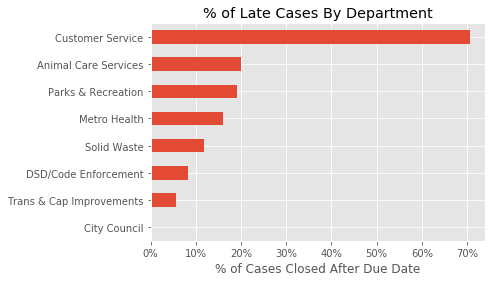

In [5]:
( df.withColumn("case_late", col("case_late").cast("int"))
    .groupby("department")
    .agg(avg("case_late").alias("p_cases_late"))
    .toPandas()
    .set_index("department")
    .p_cases_late.sort_values()
    .plot.barh()
)
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter("{:.0%}".format))
plt.gca().set(
    ylabel="",
    xlabel="% of Cases Closed After Due Date",
    title="% of Late Cases By Department",
)

- On average, how late are the late cases by department?

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Avg # of Days Late'),
 Text(0.5, 1.0, 'Number of late days by department')]

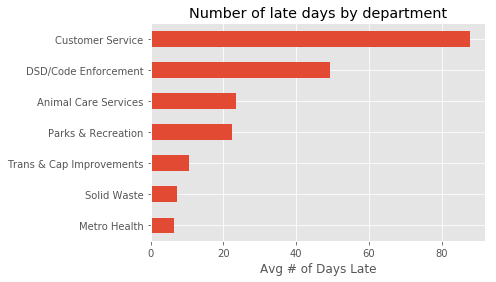

In [6]:
(df.filter("case_late")
    .groupby("department")
    .agg(avg("num_days_late").alias("avg_days_late"))
    .toPandas()
    .set_index("department")
    .avg_days_late.sort_values()
    .plot.barh()
)

plt.gca().set(
    ylabel="",
    xlabel="Avg # of Days Late",
    title="Number of late days by department",
)

- What is the service type that is the most late? Just for Parks & Rec?

[Text(0, 0.5, ''),
 Text(0.5, 0, '# of Days Late'),
 Text(0.5, 1.0, 'Most Late Cases For Parks & Recreation')]

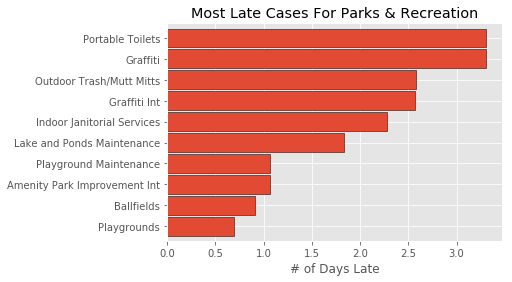

In [7]:
(
    df.filter(col('case_late'))
    .filter(df.department == "Parks & Recreation")
    .groupby("service_request_type")
    .agg(avg("num_days_late").alias("avg_days_late"))
    .sort(asc("avg_days_late"))
    .limit(10)  # limit in spark, not pandas
    .toPandas()
    .set_index("service_request_type")
    .avg_days_late
    .plot.barh(ec="black", width=0.9)
)

plt.gca().set(
    title="Most Late Cases For Parks & Recreation",
    xlabel="# of Days Late",
    ylabel="",
)

- For the DSD/Code Enforcement department, what are the most common service request types? Look at other departments too.

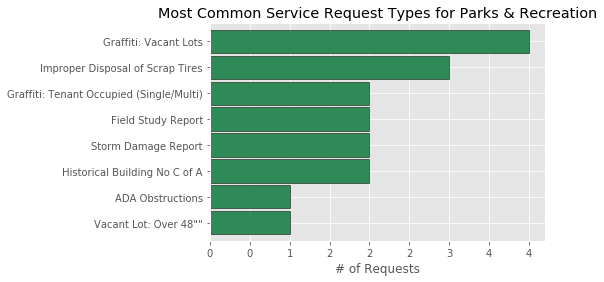

In [9]:
def format_number_sub_thousands(x, *args):
    return "{:.1f}k".format(x / 1000)
(   df.filter(expr('department == "DSD/Code Enforcement"'))   
    .groupby("service_request_type")
    .count()
    .sort(asc("count"))
    .limit(8)
    .toPandas()
    .set_index("service_request_type")["count"]
    .plot.barh(color="seagreen", width=0.9, ec="black")
)

plt.gca().set(
    ylabel="",
    xlabel="# of Requests",
    title="Most Common Service Request Types for DSD/Code Enforcement",
)
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:,.0f}'.format))

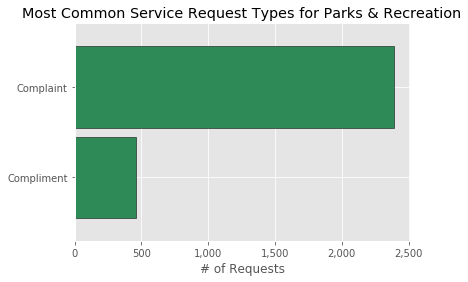

In [20]:
(   df.filter(expr('department == "Customer Service"'))   
    .groupby("service_request_type")
    .count()
    .sort(asc("count"))
    .limit(8)
    .toPandas()
    .set_index("service_request_type")["count"]
    .plot.barh(color="seagreen", width=0.9, ec="black")
)

plt.gca().set(
    ylabel="",
    xlabel="# of Requests",
    title="Most Common Service Request Types for Customer Service",
)
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:,.0f}'.format))

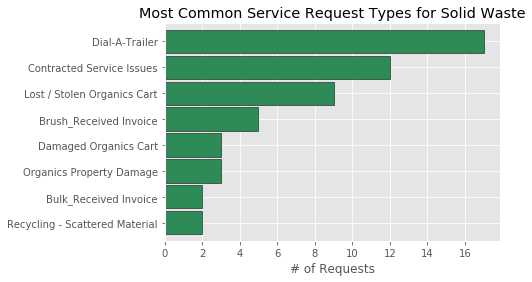

In [26]:
(   df.filter(expr('department == "Solid Waste"'))   
    .groupby("service_request_type")
    .count()
    .sort(asc("count"))
    .limit(8)
    .toPandas()
    .set_index("service_request_type")["count"]
    .plot.barh(color="seagreen", width=0.9, ec="black")
)

plt.gca().set(
    ylabel="",
    xlabel="# of Requests",
    title="Most Common Service Request Types for Solid Waste",
)
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:,.0f}'.format))

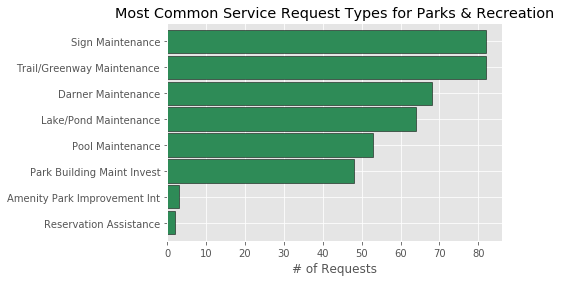

In [27]:
(   df.filter(expr('department == "Parks & Recreation"'))   
    .groupby("service_request_type")
    .count()
    .sort(asc("count"))
    .limit(8)
    .toPandas()
    .set_index("service_request_type")["count"]
    .plot.barh(color="seagreen", width=0.9, ec="black")
)

plt.gca().set(
    ylabel="",
    xlabel="# of Requests",
    title="Most Common Service Request Types for Parks & Recreation",
)
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:,.0f}'.format))

- Does whether or not its a weekend matter for when a case is opened/closed?

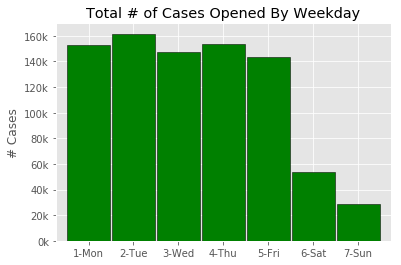

In [30]:
(
    df.withColumn("weekday", date_format("case_opened_date", "u-E"))
    .groupby("weekday")
    .count()
    .na.drop()
    .toPandas()
    .set_index("weekday")["count"]
    .sort_index()
    .plot.bar(width=0.95, ec="black", color="green")
)

plt.xticks(rotation=0)
plt.gca().set(
    xlabel="", ylabel="# Cases", title="Total # of Cases Opened By Weekday"
)
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_number))

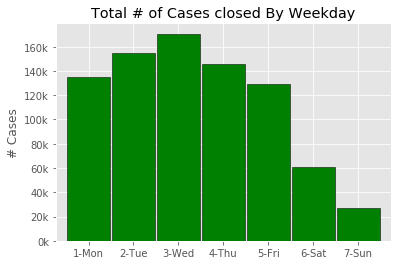

In [31]:
(
    df.withColumn("weekday", date_format("case_closed_date", "u-E"))
    .groupby("weekday")
    .count()
    .na.drop()
    .toPandas()
    .set_index("weekday")["count"]
    .sort_index()
    .plot.bar(width=0.95, ec="black", color="green")
)

plt.xticks(rotation=0)
plt.gca().set(
    xlabel="", ylabel="# Cases", title="Total # of Cases closed By Weekday"
)
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_number))

- On average, how many cases are opened a day for the Customer Service department?

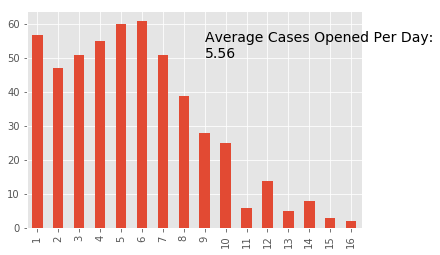

In [32]:
def plot_cases(df):
    s = df["count"]
    avg = s.mean()
    s.value_counts().sort_index().plot.bar()
    plt.text(
        8, 50, f"Average Cases Opened Per Day:\n{avg:.2f}", ha="left", size=14
    )


(
    df.withColumn("case_opened_date", expr("date(case_opened_date)"))
    .filter(df.department == "Customer Service")
    .groupby("case_opened_date")
    .count()
    .toPandas()
    .pipe(plot_cases)
)


- Does the number of service requests for the solid waste department vary by day of the week?

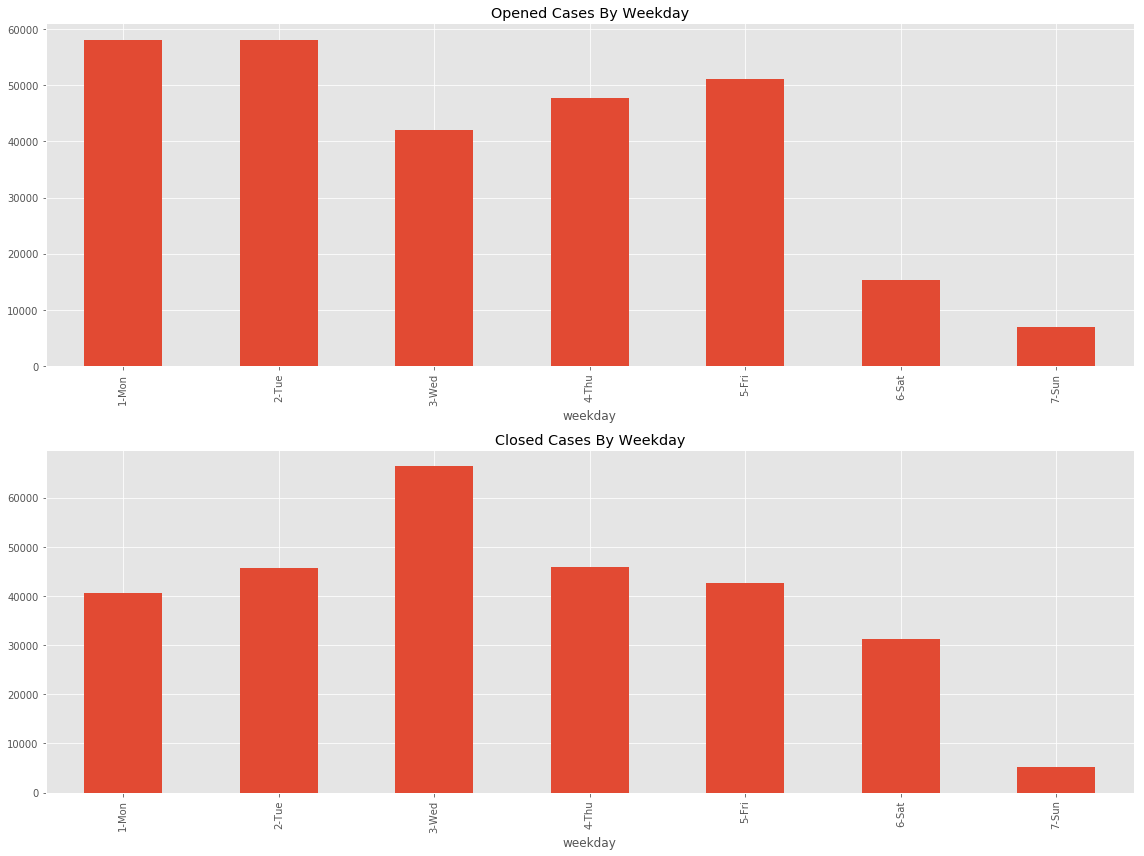

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

(
    df.withColumn("weekday", date_format("case_opened_date", "u-E"))
    .filter(expr('department == "Solid Waste"'))
    .groupby("weekday")
    .count()
    .na.drop()
    .toPandas()
    .set_index('weekday')['count']
    .sort_index()
    .plot.bar(ax=ax1)
)
ax1.set(
    title='Opened Cases By Weekday'
)
plt.xticks(rotation=0)

(
    df.withColumn("weekday", date_format("case_closed_date", "u-E"))
    .filter(expr('department == "Solid Waste"'))
    .groupby("weekday")
    .count()
    .na.drop()
    .toPandas()
    .set_index('weekday')['count']
    .sort_index()
    .plot.bar(ax=ax2)
)
ax2.set(
    title='Closed Cases By Weekday'
)
fig.tight_layout()